In [ ]:
import os
from glob import glob
from datetime import datetime

import numpy as np

import tensorflow as tf

from tensorflow.keras import layers

from tensorflow.keras import datasets

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
num_epochs = 50
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32,32,3)
num_classes = 10

In [ ]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='sparse_categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/"My Drive"/fastCampus/cifar.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: cifar/train/5501_deer.png  
  inflating: cifar/train/5502_cat.png  
  inflating: cifar/train/5503_dog.png  
  inflating: cifar/train/5504_dog.png  
  inflating: cifar/train/5505_dog.png  
  inflating: cifar/train/5506_bird.png  
  inflating: cifar/train/5507_cat.png  
  inflating: cifar/train/5508_frog.png  
  inflating: cifar/train/5509_dog.png  
  inflating: cifar/train/550_cat.png  
  inflating: cifar/train/5510_dog.png  
  inflating: cifar/train/5511_truck.png  
  inflating: cifar/train/5512_automobile.png  
  inflating: cifar/train/5513_frog.png  
  inflating: cifar/train/5514_deer.png  
  inflating: cifar/train/5515_automobile.png  
  inflating: cifar/train/5516_airplane.png  
  inflating: cifar/train/5517_dog.png  
  inflating: cifar/train/5518_horse.png  
  inflating: cifar/train/5519_truck.png  
  inflating: cifar/train/551_horse.png  
  inflating: cifar/train/5520_cat.png  
  inflating: cifar/train/5521_airplane.png  
  inflati

In [ ]:
train_paths = glob('cifar/train/*.png')[:1000]
test_paths = glob('cifar/test/*.png')[:1000]

In [ ]:
def get_class_name(path):
  fname = tf.strings.split(path,'_')[-1]
  lbl_name = tf.strings.regex_replace(fname,'.png','')
  return lbl_name

In [ ]:
train_labels = [get_class_name(path) for path in train_paths]
class_names = tf.unique(train_labels).y.numpy()#y하면결과 부분이 나온다

In [ ]:
def get_label(lbl_name):
  onehot = tf.cast(lbl_name == class_names,tf.uint8)
  return tf.argmax(onehot)

In [ ]:
def load_image_label(path):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile)
  #추가로 정규화

  image = tf.cast(image, tf.float32)/255

  class_name = get_class_name(path)
  label = get_label(class_name)



  return image, label

In [ ]:
def image_preprocess(image,label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  return image, label

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(load_image_label)

train_dataset = train_dataset.map(image_preprocess)#data augmentation

train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size = len(train_paths))
train_dataset = train_dataset.repeat()

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(load_image_label)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size = len(test_paths))
test_dataset = test_dataset.repeat()

In [ ]:
steps_per_epoch = len(train_paths) // batch_size #batch_size로 나눈걸 1562해야 epcoch
validation_steps = len(test_paths) // batch_size

history = model.fit_generator(
    train_dataset,
    steps_per_epoch = steps_per_epoch,
    validation_data = test_dataset,
    validation_steps = validation_steps,
    epochs = num_epochs
)

Epoch 1/50
31/31 [==============================] - 1s 31ms/step - loss: 1.5095 - accuracy: 0.4597 - val_loss: 1.6197 - val_accuracy: 0.3915
Epoch 2/50
31/31 [==============================] - 2s 53ms/step - loss: 1.4508 - accuracy: 0.4421 - val_loss: 1.6705 - val_accuracy: 0.3771
Epoch 3/50
31/31 [==============================] - 2s 54ms/step - loss: 1.4663 - accuracy: 0.4421 - val_loss: 1.6402 - val_accuracy: 0.3967
Epoch 4/50
31/31 [==============================] - 2s 54ms/step - loss: 1.4286 - accuracy: 0.4659 - val_loss: 1.6391 - val_accuracy: 0.3895
Epoch 5/50
31/31 [==============================] - 2s 55ms/step - loss: 1.3666 - accuracy: 0.4762 - val_loss: 1.6540 - val_accuracy: 0.4060
Epoch 6/50
31/31 [==============================] - 2s 56ms/step - loss: 1.4074 - accuracy: 0.4876 - val_loss: 1.6319 - val_accuracy: 0.4112
Epoch 7/50
31/31 [==============================] - 2s 54ms/step - loss: 1.3469 - accuracy: 0.5176 - val_loss: 1.6310 - val_accuracy: 0.3977
Epoch 8/50
31

#history 들여다 보기
### tensorboard는 중간중간 기록해야 되서 느림 근데 이거는 그거에 비해 굳

In [ ]:
history.history.keys()#요소 확인

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.params #parameter확인 가능

{'epochs': 50, 'steps': 31, 'verbose': 1}

In [ ]:
new_model = history.model#해서 옮기고

In [ ]:
#new_model.predict()해서 이 모델로 예측도 가능

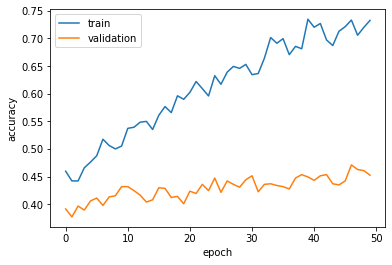

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'])

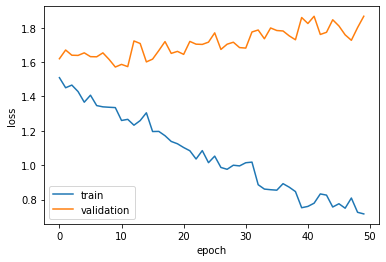

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])

#predict
   

In [ ]:
#이미지를 직접로드
path = test_paths[0]
path

'cifar/test/3443_deer.png'

In [ ]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype = tf.float32)
image.shape

TensorShape([32, 32, 3])

In [ ]:
#predict도 4차원으로 맞춰줘야한다.
image = image[tf.newaxis,...]

In [ ]:
image.shape

TensorShape([1, 32, 32, 3])

In [ ]:
pred = model.predict(image)

In [ ]:
pred.shape

(1, 10)

In [ ]:
np.argmax(pred)

8

In [ ]:
#generator로 만드는법
test_image, test_label = next(iter(test_dataset))

In [ ]:
test_image.shape

TensorShape([32, 32, 32, 3])

In [ ]:
pred = model.predict(test_image)#batch_size만큼 나온다.

In [ ]:
pred[0]

array([1.7593229e-02, 1.4929509e-01, 3.6261507e-04, 3.4086304e-04,
       8.0561458e-06, 5.1007003e-01, 3.6567443e-03, 1.9550763e-04,
       3.1134495e-01, 7.1328557e-03], dtype=float32)

In [ ]:
np.argmax(pred[0])

5

In [ ]:
#generator에서 바로 넣어주기.

In [ ]:
pred = model.predict_generator(test_dataset.take(1))#take안에 적힌만큼의 배치만 가져오겠다.

In [ ]:
model.evaluate(test_image,test_label)

1/1 [==============================] - 0s 2ms/step - loss: 1.6095 - accuracy: 0.3438


[1.6094706058502197, 0.34375]

In [ ]:
#model 저장하기
save_path = '/content/gdrive/My Drive/fastCampus/my_model.h5'
model.save(save_path,include_optimizer=True)#optimizer까지 넣으면 바로 training하면 된다.

In [ ]:
#model = tf.keras.models.load_model('my_model.h5')
#이런식으로 불러오기 가능

In [ ]:
model.save_weights('/content/gdrive/My Drive/fastCampus/model_weights.h5')

In [ ]:
#모델 구조는 json으로 저장할 수 있다.
with open('/content/gdrive/My Drive/fastCampus/model_architecture.json','w') as f:
  f.write(model.to_json())

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
with open('/content/gdrive/My Drive/fastCampus/model_architecture.json','r') as f:
  model = model_from_json(f.read())

#구조만 가져온 상태

In [ ]:
model.load_weights('/content/gdrive/My Drive/fastCampus/model_weights.h5')
#요롷게 하면 weight까지 불러온상태.

#h5 모델 들여다보기

In [ ]:
import h5py

In [ ]:
model_file = h5py.File('/content/gdrive/My Drive/fastCampus/my_model.h5','r+')

In [ ]:
model_file.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [ ]:
model_file['model_weights'].keys()#구조 확인 가능

<KeysViewHDF5 ['activation', 'activation_1', 'activation_2', 'activation_3', 'activation_4', 'activation_5', 'conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3', 'dense', 'dense_1', 'dropout', 'dropout_1', 'dropout_2', 'flatten', 'input_1', 'max_pooling2d', 'max_pooling2d_1']>

In [ ]:
model_file['model_weights']['conv2d']['conv2d'].keys()

<KeysViewHDF5 ['bias:0', 'kernel:0']>

In [ ]:
model_file['model_weights']['conv2d']['conv2d']['kernel:0']#이게 모델이당.

<HDF5 dataset "kernel:0": shape (3, 3, 3, 32), type "<f4">

In [ ]:
#위의 거를 array로 꺼내오기
weight = np.array(model_file['model_weights']['conv2d']['conv2d']['kernel:0'])

In [ ]:
weight

array([[[[-7.97398295e-03,  8.18120837e-02, -9.16455537e-02,
           1.32935673e-01, -1.59052797e-02,  1.15927542e-02,
           6.95402995e-02,  5.65326139e-02,  4.33014445e-02,
           7.79020265e-02,  1.18954554e-01, -1.60802454e-01,
           1.71281740e-01,  1.16764367e-01, -5.93196265e-02,
          -6.11206330e-02, -6.10294752e-02, -1.58049300e-01,
           1.15541168e-01, -6.72586560e-02, -6.06837682e-02,
          -1.01641826e-01,  5.89060262e-02,  1.04695737e-01,
          -1.48915455e-01,  2.59366184e-02,  1.14678442e-02,
           4.09743674e-02,  1.03992119e-01,  1.15226284e-01,
           5.15037514e-02,  4.42793481e-02],
         [-9.94066224e-02, -5.96514717e-02, -1.88384682e-01,
           1.39162978e-02,  1.01249568e-01,  3.85804772e-02,
          -2.46022232e-02, -1.09906353e-01,  8.36595520e-02,
           1.79907039e-01, -2.84189750e-02,  6.16264604e-02,
          -7.07765222e-02,  1.04463942e-01, -3.54887955e-02,
          -1.03029825e-01, -8.69998857e-